TASK 1 : 

Prediction using Supervised ML
(Level - Beginner)
● Predict the percentage of an student based on the no. of study hours.
● This is a simple linear regression task as it involves just 2 variables.
● You can use R, Python, SAS Enterprise Miner or any other tool
● Data can be found at http://bit.ly/w-data
● What will be predicted score if a student studies for 9.25 hrs/ day?
● Sample Solution : https://bit.ly/2HxiGGJ
● Task submission:
1. Host the code on GitHub Repository (public). Record the code and output in
a video. Post the video on YouTube
2. Share links of code (GitHub) and video (YouTube) as a post on YOUR
LinkedIn profile, not TSF Network.
3. Submit the LinkedIn link in Task Submission Form when shared.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as stat
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error

In [2]:
link= 'http://bit.ly/w-data'
data=pd.read_csv(link)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Text(0.5, 1.0, 'Scatter Plot')

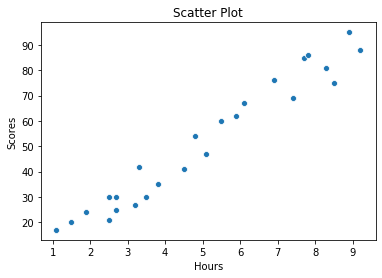

In [3]:
sns.scatterplot(x=data['Hours'],y=data['Scores'])
plt.title('Scatter Plot')

*** from above scatter plot we clearly see that Score and hours variable show strong linear relationship....

In [4]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0.5, 1.0, 'Box Plot')

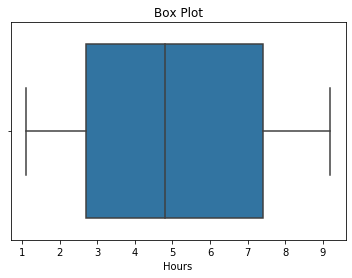

In [5]:
sns.boxplot(data['Hours'])
plt.title('Box Plot')

Text(0.5, 1.0, 'Box Plot')

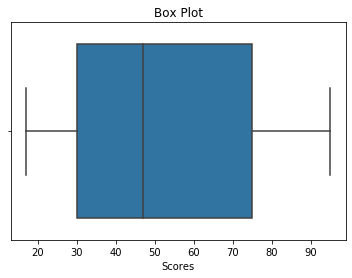

In [6]:
sns.boxplot(data['Scores'])
plt.title('Box Plot')

 ****  From above whisker and box plot we see that there is no outlier in our dataframe.....

Text(0.5, 1.0, 'Residual Plot')

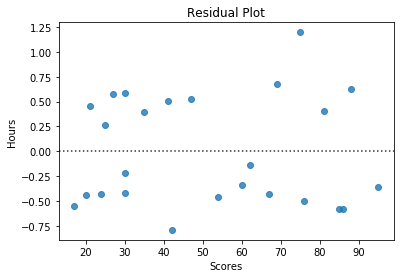

In [7]:
sns.residplot(data['Scores'],data['Hours'])
plt.title('Residual Plot')

*** Random spread around X-axis shows that linear model is appropriate....

Text(0.5, 1.0, 'Histogram')

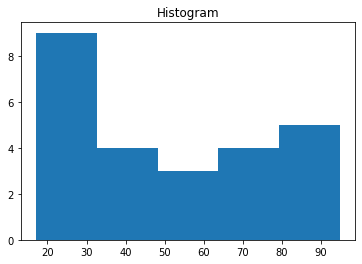

In [8]:
plt.hist(data['Scores'],bins=5)
plt.title('Histogram')
# its shows that our data is slightly right skewed........

Text(0.5, 1.0, 'Histogram')

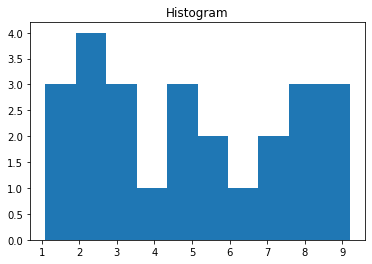

In [9]:
plt.hist(data['Hours'],bins=10)
plt.title('Histogram')
# its shows that our data is slightly right skewed........

In [10]:
y=data[['Scores']]
x=data[['Hours']]

In [11]:
s=stat.OLS(y,x)
m=s.fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Scores   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              2579.
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                    6.10e-26
Time:                        00:53:12   Log-Likelihood:                         -78.026
No. Observations:                  25   AIC:                                      158.1
Df Residuals:                      24   BIC:                                      159.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Hours         10.1743      0.200     50.787      0.000       9.761      10.588
==============================================================================
Omnibus:                        4.755   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                2.042
Skew:                          -0.363   Prob(JB):                        0.360
Kurtosis:                       1.803   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Training And Testing of data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_hat=lr.predict(x_test)

b_1=lr.coef_
b_0=lr.intercept_
line=b_0 +x*b_1

In [36]:
print(r2_score(y_hat,y_test))
print(mean_absolute_error(y_hat,y_test))

0.9546785947197246
4.183859899002975


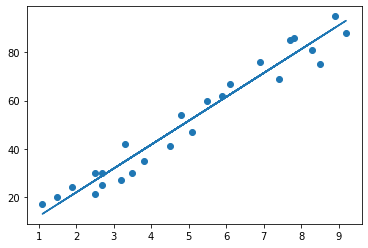

In [37]:
plt.scatter(x,y)
plt.plot(x,line)

In [43]:
df=pd.DataFrame(y_hat,columns=['Predicted value'])
df.reset_index(drop=True, inplace=True)

In [45]:
y_test.reset_index(drop=True, inplace=True)

In [47]:
df2=pd.concat([df,y_test],axis=1)

In [48]:
df2

,Predicted value,Scores
0,16.884145,20
1,33.732261,27
2,75.357018,69
3,26.794801,30
4,60.491033,62


#  TEST CASE : What will be predicted score if a student studies for 9.25 hrs/ day? 

In [57]:
m1=np.array(9.25).reshape(-1,1)
y2=lr.predict(m1)
print('predicted score if a student studies for {} hours is {}'.format(m1[0][0],y2[0][0]))

predicted score if a student studies for 9.25 hours is 93.69173248737538
